## What is GeoPandas?

GeoPandas is a powerful Python library that extends [pandas](/pandas) to handle **geographic data**. It combines:

- Data manipulation tools of pandas
- Geospatial functionality of libraries like `shapely` and `fiona`

Key benefits:

- Efficient handling of geospatial data
- Useful for data science and visualization projects

You can it with

`pip install geopandas`

And import it with:


In [1]:
import geopandas as gpd

## Reading Geospatial Data

GeoPandas excels at reading various geospatial file formats:

- Shapefiles
- GeoJSON
- GeoPackage

Let's read a GeoJSON file of world country boundaries:

**Main functions used:**

- `gpd.read_file()`: Reads geospatial data from a file
- `gpd.datasets.get_path()`: Provides path to built-in datasets


In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

/var/folders/m2/jfzxyg4s0xz3jyw5f94r7tcm0000gn/T/ipykernel_81203/913829029.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


## Basic Data Manipulation

GeoPandas allows you to manipulate geometric data using familiar pandas operations:

- Filtering
- Grouping
- Aggregating

Example: Filter to show only European countries:


In [3]:
europe = world[world['continent'] == 'Europe']
europe.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
18,144373535.0,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((180.00000 71.51571, 180.00000 ..."
21,5347896.0,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
43,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
110,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
111,9466856.0,Europe,Belarus,BLR,63080,"POLYGON ((28.17671 56.16913, 29.22951 55.91834..."


**Key concept:** GeoDataFrames behave like regular pandas DataFrames but preserve geometric data.

## Visualizing Geospatial Data

GeoPandas leverages [matplotlib](/matplotlib) for **quick and easy map creation**:

- `.plot()`: Creates a plot of the GeoDataFrame
- `column`: Specifies which data to use for coloring
- `cmap`: Sets the color scheme
- `legend`: Adds a color bar
- `figsize`: Sets the figure size


(30.0, 90.0)

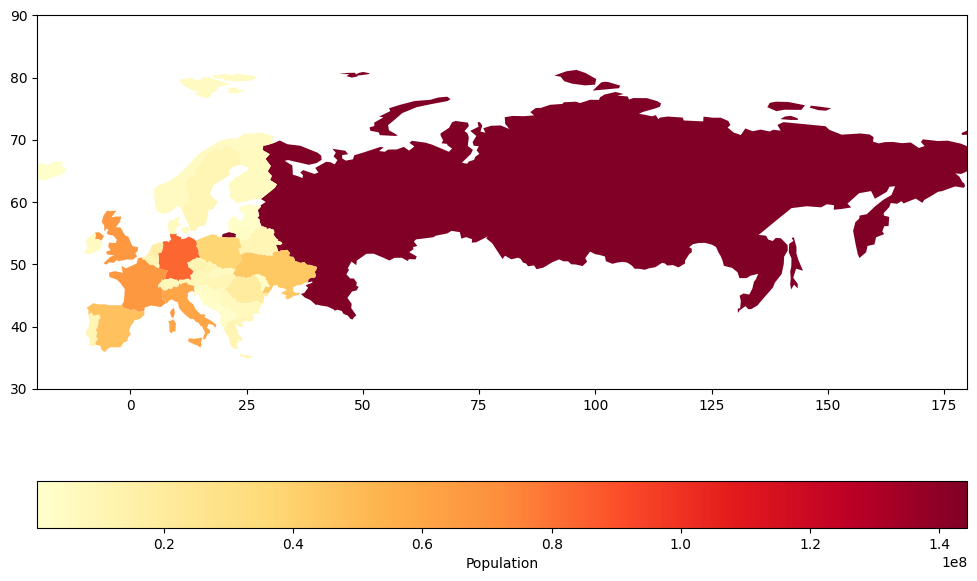

In [7]:
ax = europe.plot(column='pop_est', cmap='YlOrRd', legend=True,
            legend_kwds={'label': 'Population', 'orientation': 'horizontal'},
            figsize=(12, 8))

ax.set_xlim(-20, 180)
ax.set_ylim(30, 90)

## Geospatial Operations

GeoPandas enables various geospatial operations, crucial for advanced analysis and visualizations:

- `.geometry.centroid`: Calculates the geometric center of each shape
- `.plot()`: Can be used multiple times on the same axis (`ax`) to overlay different geometries


/var/folders/m2/jfzxyg4s0xz3jyw5f94r7tcm0000gn/T/ipykernel_81203/2886758021.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  europe['centroid'] = europe.geometry.centroid
/Users/josephbarbier/Desktop/The-Python-Graph-Gallery/venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/m2/jfzxyg4s0xz3jyw5f94r7tcm0000gn/T/ipykernel_81203/2886758021.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS 

(30.0, 90.0)

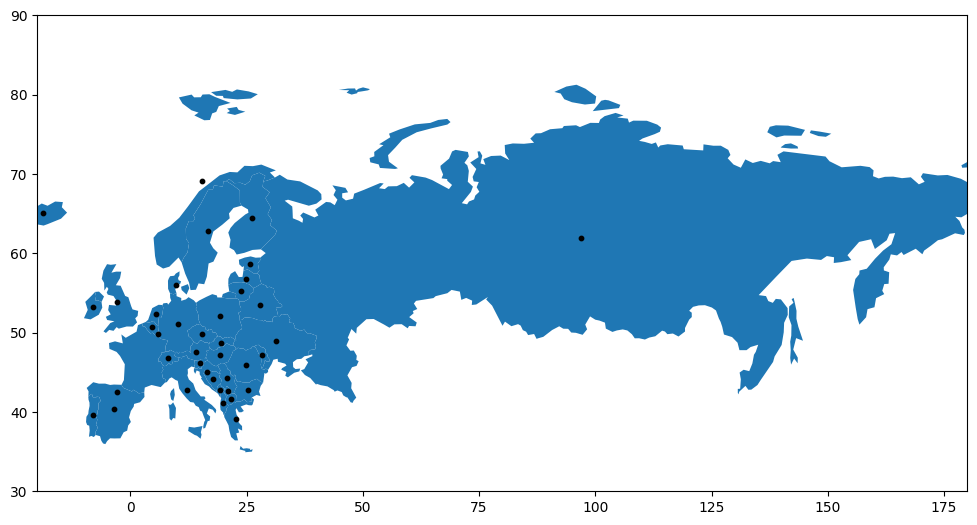

In [14]:
# Calculate centroids
europe['centroid'] = europe.geometry.centroid

# Plot countries and centroids
ax = europe.plot(figsize=(12, 8))
europe.centroid.plot(ax=ax, color='black', markersize=10)

ax.set_xlim(-20, 180)
ax.set_ylim(30, 90)

## Going further

**TLDR: geopandas allows to**

- Perform spatial analysis
- Create multi-layered visualizations

Remember, GeoPandas integrates well with other Python geospatial libraries:

- `cartopy` for advanced mapping
- [folium](/288-map-background-with-folium) for interactive web maps

These examples provide a foundation, but GeoPandas offers much more:

- Spatial joins
- Coordinate reference system operations
- Complex geospatial analyses

As you explore further, you'll discover its full potential for geospatial data visualization and analysis.
